In [1]:
# Loads the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loads haberman.csv
haberman = pd.read_csv('haberman.csv')

In [3]:
haberman

,Age,Year,Nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0


In [4]:
# Slices the features of the dataset
X = haberman[['Age', 'Year', 'Nodes']]
y = haberman[["Survived"]]

In [5]:
# Scales the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=['Age', 'Year', 'Nodes'])

In [6]:
X_scaled

,Age,Year,Nodes
0,-2.082140,0.353584,-0.421592
1,-2.082140,-0.262921,-0.142959
2,-2.082140,0.661837,-0.560909
3,-1.989426,-1.187680,-0.282275
4,-1.989426,0.661837,-0.003642
...,...,...,...
301,2.090018,-0.262921,-0.421592
302,2.182732,1.278342,-0.560909
303,2.275447,0.661837,-0.142959
304,2.368162,0.661837,-0.421592


In [7]:
# Splits the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=123
)

In [8]:
# Initializes and fits a perceptron model
clf = Perceptron(tol=0.00001, eta0=0.1, max_iter=20000)
clf.fit(X_train, np.ravel(y_train))

Perceptron(eta0=0.1, max_iter=20000, tol=1e-05)

In [9]:
# Creates a list of predictions from the test features
y_pred = clf.predict(X_test)

In [10]:
# Show model predictions
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [11]:
# Show actual values
np.ravel(y_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [12]:
# Finds the weights
print(clf.coef_)
print(clf.intercept_)

[[-0.20821401 -0.0879427  -0.30686072]]
[0.1]


In [13]:
# Finds the accuracy score
accuracy_score(y_pred, y_test)

0.6774193548387096

<Axes: >

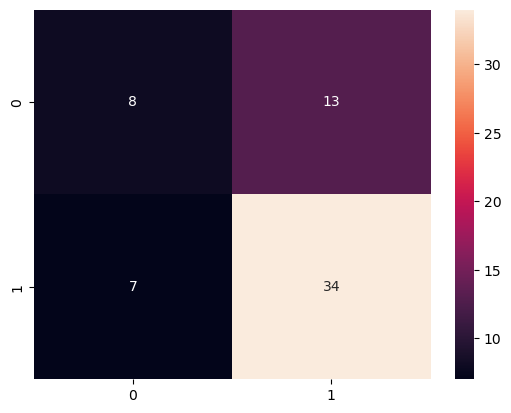

In [14]:
# Displays a heatmap for the confusion matrix
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

In [15]:
# Displays the classification report for the model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44        21
           1       0.72      0.83      0.77        41

    accuracy                           0.68        62
   macro avg       0.63      0.61      0.61        62
weighted avg       0.66      0.68      0.66        62

